Accuracy: 0.9986666666666667


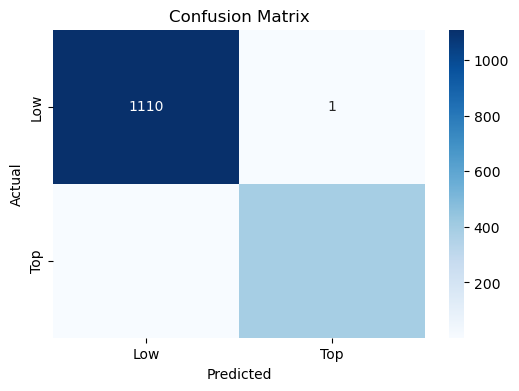

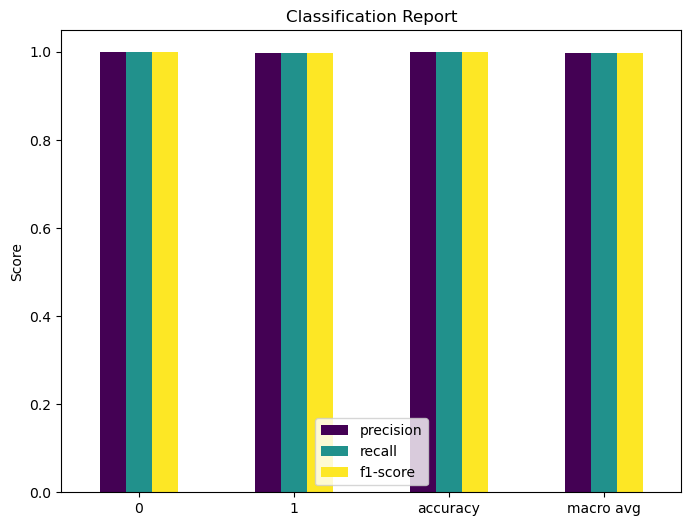

In [3]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the saved model
model = joblib.load("best_svm_model.pkl")

# Reload the test data
df = pd.read_csv("synthetic_student_dataset.csv")  # Ensure this is the same dataset used initially
df.columns = df.columns.str.strip()

# Preprocess the test data as before
df.dropna(subset=["english.grade", "math.grade", "sciences.grade", "language.grade"], inplace=True)
df["overall_grade"] = df["english.grade"] + df["math.grade"] + df["sciences.grade"] + df["language.grade"]

# Set threshold for labels
threshold = df["overall_grade"].quantile(0.75)
df["top_low_studying"] = (df["overall_grade"] >= threshold).astype(int)

# Split data into features and target variable
X_test = df.drop(columns=["top_low_studying", "overall_grade", "id", "name"], errors='ignore')
y_test = df["top_low_studying"]

# Predict on the test set using the loaded model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Top"], yticklabels=["Low", "Top"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), colormap="viridis")
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
